### Aplicación de PCA y K-MEANS al tema del [combate en el tiempo] a las **DROGAS Y LA CORRUPCIÓN**

#### **Contexto**
* 1
---


#### **Impacto en Programas de Gobierno**
1. **Salud Pú**:
   - Polític

2. **Econo**:
   - Planifica
   - 


#### **Variables 'per' elegidas para representar el efecto del DROGAS y CORRUPCIÓN en programas de gobierno**

- **per603**: 
  - Traditional Morality: Positive (Dominio: Fabric of Society)  
    <img src="../assets/per603_drogas.png" alt="Descripción per603" style="width:600px;">

- **per604**: 
  - Traditional Morality: Negative (Dominio: Fabric of Society)  
    <img src="../assets/per604_drogas.png" alt="Descripción per604" style="width:600px;">

- **per605**: 
  - Law and Order: Positive (Dominio: Fabric of Society)  
    <img src="../assets/per605_1_drogas.png" alt="Descripción per605_1" style="width:600px;">

- **per605**: 
  - Law and Order: Negative (Dominio: Fabric of Society)  
    <img src="../assets/per605_2_drogas.png" alt="Descripción per605_2" style="width:600px;">

- **per104**: 
  - Military: Positive (Dominio: External Relations)  
    <img src="../assets/per104_drogas.png" alt="Descripción per104" style="width:600px;">

- **per304**: 
  - Political Corrupcion (Dominio: Political System)  
    <img src="../assets/per304_drogas.png" alt="Descripción per304" style="width:600px;">
  

#### Cargamos librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#### Cargamos la matriz de aspectos y la descripción de las variables 'per'

In [2]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
# 603, 604, 605, 104, 304
data_aspectos = {
    'aspecto': ['DROGAS_Y_CORRUPCIÓN'],
    'var_1': ['per603'],
    'var_2': ['per604'],
    'var_3': ['per605'],
    'var_4': ['per104'],
    'var_5': ['per304']
}
df_aspectos = pd.DataFrame(data_aspectos)
display(df_aspectos)
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
display(df_AD.head())

,aspecto,var_1,var_2,var_3,var_4,var_5
0,DROGAS_Y_CORRUPCIÓN,per603,per604,per605,per104,per304


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [3]:
detalle_dominio_values = df_AD['Detalle_Dominio'].unique().tolist()
print(detalle_dominio_values)

['Foreign Special Relationships: Positive', 'Foreign Special Relationships: Negative', 'Anti-Imperialism', 'Military: Positive', 'Military: Negative', 'Peace', 'Internationalism: Positive', 'European Community/Union: Positive', 'Internationalism: Negative', 'European Community/Union: Negative', 'Freedom and Human Rights', 'Democracy', 'Constitutionalism: Positive', 'Constitutionalism: Negative', 'Decentralization', 'Centralisation', 'Governmental and Administrative Efficiency', 'Political Corruption', 'Political Authority', 'Free Market Economy', 'Incentives: Positive', 'Market Regulation', 'Economic Planning', 'Corporatism/Mixed Economy', 'Protectionism: Positive', 'Protectionism: Negative', 'Economic Goals', 'Keynesian Demand Management', 'Economic Growth: Positive', 'Technology and Infrastructure: Positive', 'Controlled Economy', 'Nationalisation', 'Economic Orthodoxy', 'Marxist Analysis', 'Anti-Growth Economy: Positive', 'Environmental Protection', 'Culture: Positive', 'Equality: P

#### Carga del dataset y definición del périodo en análisis ('desde' y 'hasta'), y el 'aspecto'

In [4]:
# Cargar el dataset principal
# Nota: 'MP_Dataset_KMeans.xlsx' se genera desde el data set 'crudo' del Manifesto Project (notebook 'Correlaciones_General.ipynb', dataframe 'df_ponderado'),
# el cual ha sido ponderado por 'presvote' o 'pervote' y se le ha agregado la columna 'agno'
# Sólo se han eliminado columnas que no son necesarias para K-MEANS

file_path = './data/MP_Dataset_KMeans.xlsx'
df = pd.read_excel(file_path)

# Filtrar el DataFrame según las variables del aspecto seleccionado y el período
aspecto_filtro = 'DROGAS_Y_CORRUPCIÓN'
desde = 2019
hasta = 2022

variables = df_aspectos[df_aspectos['aspecto'] == aspecto_filtro][['var_1', 'var_2', 'var_3', 'var_4', 'var_5']].dropna().values.flatten()

In [5]:
df

,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,1.770988,0.000000,0.031388,3.046506,0.015910,0.032313,3.406129,1.114989,...,6.169728,0.693075,0.047278,0.000000,0.653683,0.000000,7.209393,0.000000,0.432663,3.775716
1,2001,Albania,2.392570,0.000000,0.000000,2.757403,0.026619,0.023948,3.523162,1.452779,...,4.998334,0.559072,0.008873,0.000000,0.221163,0.000000,12.047034,0.000000,0.542726,5.413989
2,1989,Argentina,0.000000,0.000000,4.619213,0.448618,0.828036,0.338070,2.955090,0.000000,...,1.449244,7.595332,0.326532,0.000000,6.796459,0.000000,2.495280,0.000000,0.204032,2.052427
3,1995,Argentina,0.061642,0.020140,0.143247,0.882433,0.083005,1.107286,1.996025,1.669947,...,0.760726,1.997920,0.323973,0.000000,2.925856,0.000000,1.499031,0.000000,0.247097,1.202382
4,1999,Argentina,0.192543,0.000000,0.582363,0.524400,0.017829,0.613450,3.482869,2.262154,...,4.334891,2.496205,0.928464,0.000000,2.535425,0.089349,1.074752,0.039445,0.899614,1.459349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2008,United States,1.978711,0.088485,0.044020,5.839310,0.088485,1.308294,8.863648,0.343947,...,4.320817,0.726361,1.937831,0.000000,2.202840,0.088485,1.111951,1.338457,2.220281,7.300000
735,2012,United States,0.505120,0.161887,0.189797,7.527242,1.491961,0.658037,6.073936,0.000000,...,2.832373,1.066517,1.133258,0.420896,4.712898,0.728224,1.688650,0.550970,0.332768,1.077957
736,2016,United States,0.866280,0.111349,0.000000,5.807609,0.763045,0.635581,4.669601,0.000000,...,2.576887,0.892558,2.209925,0.101186,3.337620,0.378490,1.657539,0.137627,0.000000,1.943070
737,2020,United States,1.190682,0.129249,0.161450,5.565559,1.951804,0.480557,3.907785,0.020377,...,2.701554,0.536329,2.539123,0.065419,3.689077,0.370070,1.991430,0.141595,0.040232,1.280783


#### 1.Filtrar y Normalizar datos

In [6]:
# Filtrar el DataFrame para las variables del aspecto, y normalizar si es necesario
df_filtered = df[(df['agno'] >= desde) & (df['agno'] <= hasta)][['countryname', 'agno'] + list(variables)].copy()
df_filtered.dropna(inplace=True)

# Normalizar las columnas per
columns_per = variables
df_filtered['per_sum'] = df_filtered[columns_per].sum(axis=1)
rows_to_normalize = df_filtered['per_sum'] != 1.0
df_filtered.loc[rows_to_normalize, columns_per] = df_filtered.loc[rows_to_normalize, columns_per].div(
    df_filtered.loc[rows_to_normalize, 'per_sum'], axis=0
)
df_filtered.drop(columns=['per_sum'], inplace=True)

# Verificar que las variables per sumen 1
assert df_filtered[columns_per].sum(axis=1).round(6).eq(1).all(), "Error: las variables per no suman 1."


#### 2.Realizar PCA

In [7]:
# Seleccionar sólo las columnas numéricas (per) para PCA
numeric_data = df_filtered[columns_per]

# Ejecutar PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(numeric_data)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# Combinar con las columnas categóricas
df_pca = pd.concat([df_filtered[['countryname', 'agno']].reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Verificar el resultado
print(df_pca.info())
print(df_pca.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   countryname  30 non-null     object 
 1   agno         30 non-null     int64  
 2   PC1          30 non-null     float64
 3   PC2          30 non-null     float64
 4   PC3          30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB
None
  countryname  agno       PC1       PC2       PC3
0   Argentina  2019  0.108877  0.407020 -0.051275
1     Armenia  2021  0.541727 -0.151807 -0.078022
2   Australia  2019 -0.049141 -0.092471 -0.116803
3   Australia  2022  0.338596 -0.043389 -0.056313
4     Austria  2019 -0.209349 -0.019680 -0.004818
5     Belgium  2019 -0.269575 -0.128501 -0.027661
6      Brazil  2022 -0.111577  0.157617  0.063097
7      Canada  2019 -0.153294 -0.082480 -0.064516
8       Chile  2021 -0.221198 -0.051939  0.070498
9     Denmark  2019 -0.211944 -0.1678

In [8]:
# # Identificar y eliminar filas con NaN
# if df_periodo.isna().any().any():
#     print(f"Valores NaN detectados en el período {inicio}-{fin}. Eliminando filas con NaN.")
#     print(df_periodo[df_periodo.isna().any(axis=1)])  # Imprimir filas problemáticas para inspección
#     df_periodo.dropna(inplace=True)


#### Varianza explicada por cada componente de PCA

In [9]:
# Calcular la varianza explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Mostrar el porcentaje de varianza acumulada con las componentes disponibles
print(f"La varianza acumulada con las componentes principales disponibles es: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1] * 100:.2f}%)")

# Validar si es posible alcanzar el 90% de varianza explicada
if cumulative_variance[-1] < 0.90:
    print("No es posible explicar el 90% de la varianza con las componentes disponibles.")
    optimal_components = len(cumulative_variance)  # Todas las componentes disponibles
else:
    optimal_components = np.argmax(cumulative_variance >= 0.90) + 1
    print(f"El número mínimo de componentes para explicar el 90% de la varianza es: {optimal_components}")


La varianza acumulada con las componentes principales disponibles es: 0.9870 (98.70%)
El número mínimo de componentes para explicar el 90% de la varianza es: 2


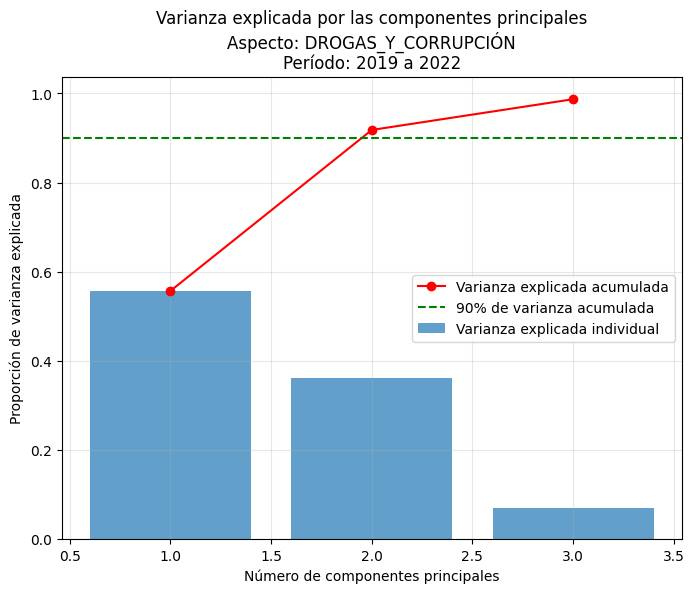

Componente 1: 0.5571 (0.5571 acumulado)
Componente 2: 0.3610 (0.9181 acumulado)
Componente 3: 0.0689 (0.9870 acumulado)
La varianza acumulada con las componentes principales disponibles es: 0.9870 (98.70%)


In [10]:
# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza acumulada
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Visualización de la varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Varianza explicada individual')
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', color='red', label='Varianza explicada acumulada')
plt.title(f"Varianza explicada por las componentes principales\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% de varianza acumulada')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Imprimir la varianza explicada
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Componente {i}: {ratio:.4f} ({explained_variance_cumulative[i-1]:.4f} acumulado)")
# Mostrar el porcentaje de varianza acumulada con las componentes disponibles
print(f"La varianza acumulada con las componentes principales disponibles es: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1] * 100:.2f}%)")


In [11]:
# Calcular las cargas de las variables originales en las componentes principales
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)
# Mostrar las cargas
display(loadings)


,PC1,PC2,PC3
per603,0.012637,-0.071884,0.819329
per604,-0.090966,-0.063521,0.128213
per605,-0.734272,-0.233180,-0.367688
per104,0.653535,-0.474683,-0.356824
per304,0.159066,0.843268,-0.223031


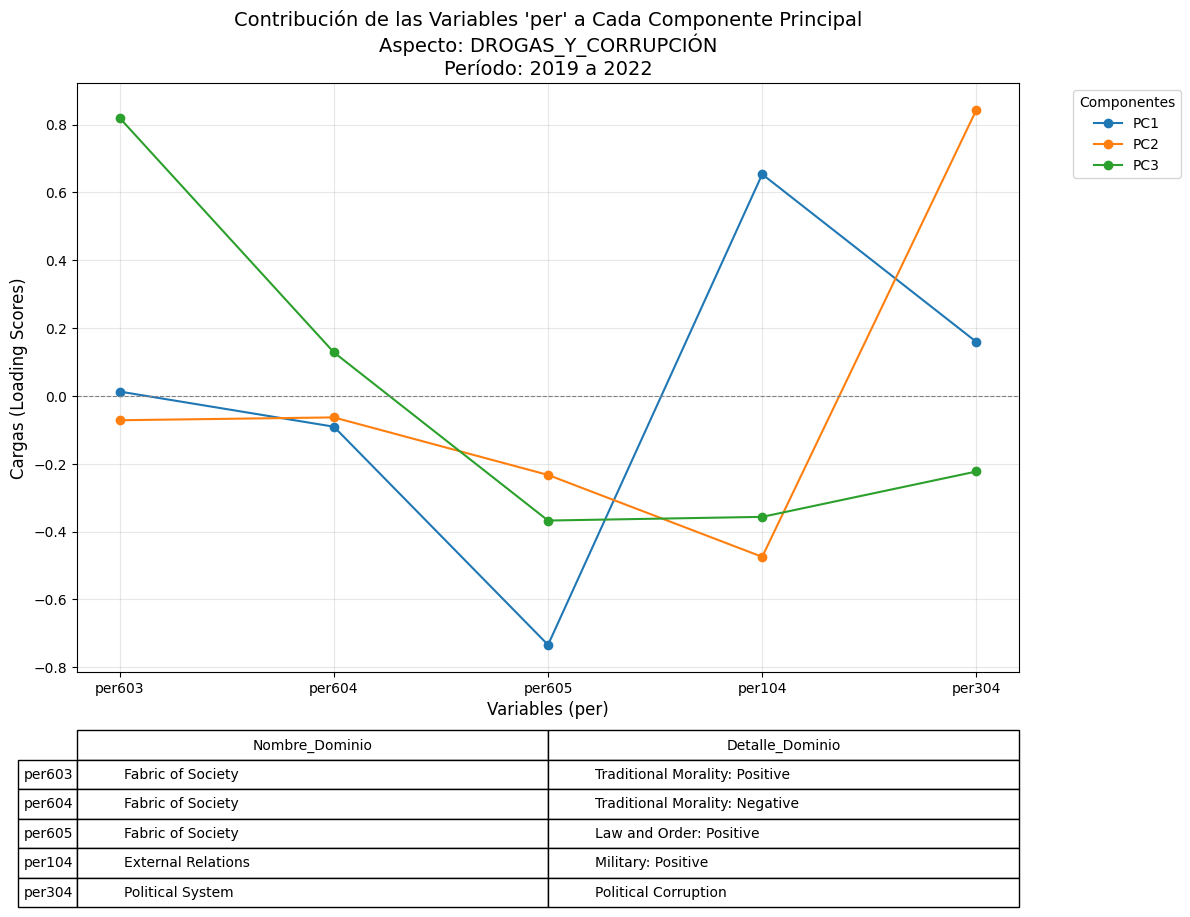

In [12]:
# Calcular las cargas (loading scores)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)

# Obtener información de las variables del aspecto desde df_AD
variables_info = df_AD[df_AD['Variable_per'].isin(columns_per)][['Variable_per', 'Nombre_Dominio', 'Detalle_Dominio']]
variables_info = variables_info.set_index('Variable_per').reindex(columns_per)

# Graficar las cargas para cada componente principal
fig, ax = plt.subplots(figsize=(12, 10))

for i, col in enumerate(loadings.columns):
    ax.plot(loadings.index, loadings[col], marker='o', label=col)

# Configuración del gráfico
ax.set_title(f"Contribución de las Variables 'per' a Cada Componente Principal\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}", fontsize=14)
ax.set_xlabel('Variables (per)', fontsize=12)
ax.set_ylabel('Cargas (Loading Scores)', fontsize=12)
ax.set_xticks(range(len(loadings.index)))
ax.set_xticklabels(loadings.index, rotation=0, ha='center')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.legend(title='Componentes', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(alpha=0.3)

# Crear la tabla con la información adicional
from matplotlib.table import Table

table_data = variables_info[['Nombre_Dominio', 'Detalle_Dominio']].values
table_col_labels = ['Nombre_Dominio', 'Detalle_Dominio']
table_row_labels = variables_info.index

# Agregar la tabla al gráfico
table = plt.table(cellText=table_data,
                  colLabels=table_col_labels,
                  rowLabels=table_row_labels,
                  cellLoc='left',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1.0, 0.3])  # Ajustar posición y tamaño

# Ajustar diseño
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.2)

plt.tight_layout()
plt.show()


In [13]:
# Mostrar los loading scores como una tabla
print("Loading Scores (Contribución de cada variable a las componentes principales):")
display(loadings.round(4))  # Limitar a 4 decimales para mayor claridad

Loading Scores (Contribución de cada variable a las componentes principales):


,PC1,PC2,PC3
per603,0.0126,-0.0719,0.8193
per604,-0.0910,-0.0635,0.1282
per605,-0.7343,-0.2332,-0.3677
per104,0.6535,-0.4747,-0.3568
per304,0.1591,0.8433,-0.2230


#### 3.Elbow + K-MEANS
* Con K-MEANS vemos si es que los componentes principales forman clusteres
* Para saber el número óptimo de clusteres en un método de clasificación como K_MEANS, usamos el "elbow method". Este método:
* * Calcula los WCSS (Within-Cluster Sum of Squares): Mide la suma de las distancias cuadradas entre los puntos de datos y el centroide de su clúster.
* * Se calcula WCSS para diferentes números de clústeres (kk)
* * Al graficar kk contra WCSS, la curva normalmente muestra una pendiente pronunciada que luego se estabiliza.
* * El "codo" es el punto donde la reducción en WCSS deja de ser significativa, indicando que agregar más clústeres no mejora sustancialmente la compactación

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

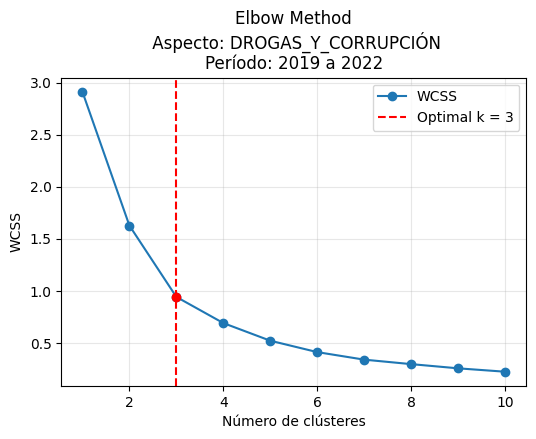

El número óptimo de clústeres (elbow method) es: 3


In [14]:
from kneed import KneeLocator

# Usar los datos normalizados de 'numeric_data' para calcular WCSS
data_scaled = numeric_data  # Asegúrate de que sea el conjunto de datos numéricos normalizados

# Calcular WCSS para determinar el número óptimo de clústeres
max_k = 10
wcss = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Encontrar el codo automáticamente
kl = KneeLocator(range(1, max_k + 1), wcss, curve="convex", direction="decreasing")
optimal_k = kl.knee

# Graficar el método del codo
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_k + 1), wcss, marker='o', label="WCSS")
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', zorder=5)  # Punto del codo
plt.title(f"Elbow Method\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"El número óptimo de clústeres (elbow method) es: {optimal_k}")


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


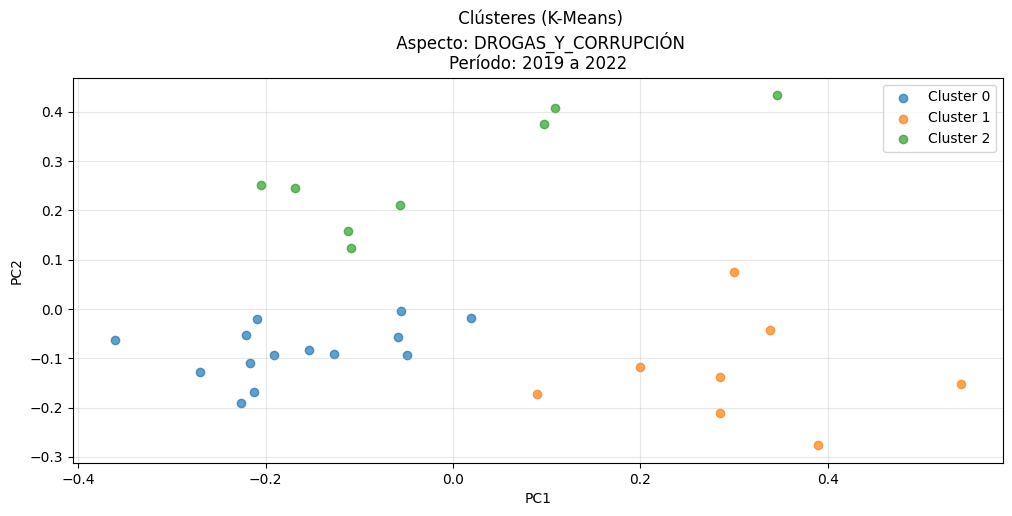

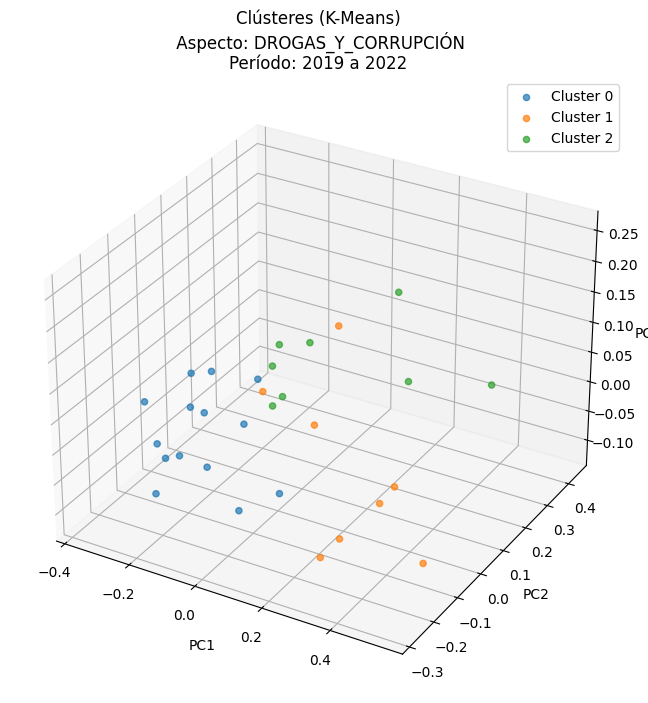

In [15]:
from mpl_toolkits.mplot3d import Axes3D
# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

# Visualizar clústeres en 2D
plt.figure(figsize=(12, 5))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title(f" Clústeres (K-Means)\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Visualizar clústeres en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title(f"Clústeres (K-Means)\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()


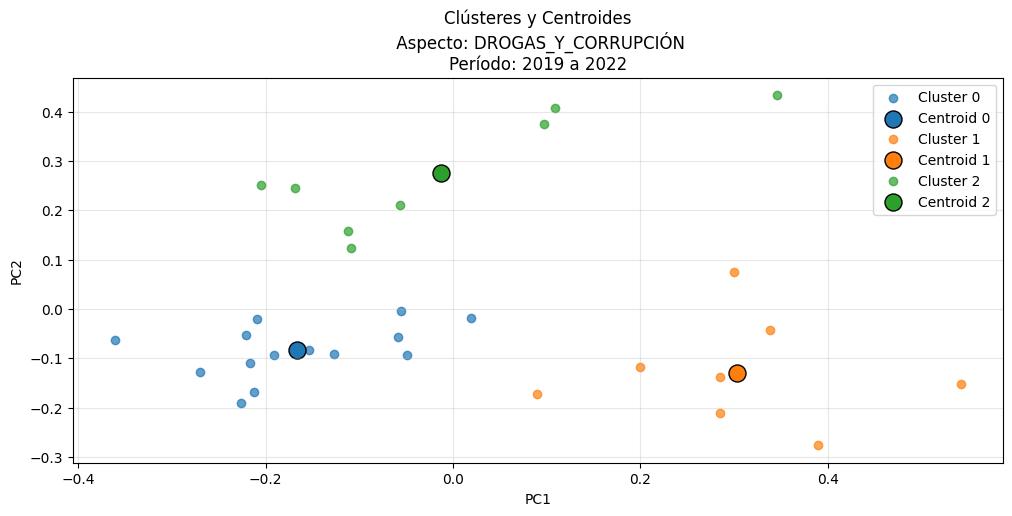

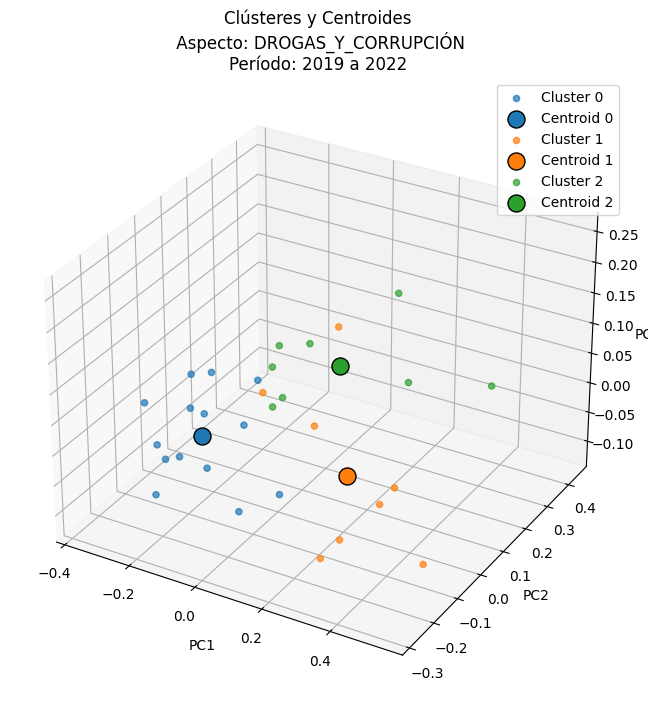

Coordenadas de los centroides:


,PC1,PC2,PC3
0,-0.166429,-0.083496,-0.012726
1,0.303562,-0.129336,0.017665
2,-0.012311,0.275453,0.004605


In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los centroides del modelo K-Means
centroids = kmeans.cluster_centers_

# Crear un DataFrame para los centroides con las etiquetas de los componentes principales
centroids_df = pd.DataFrame(centroids, columns=['PC1', 'PC2', 'PC3'])

# Crear una paleta de colores para los clústeres
colors = plt.cm.tab10(range(optimal_k))

# Gráfico en 2D
plt.figure(figsize=(12, 5))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])
    
    # Añadir los centroides con el color correspondiente
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], color=colors[cluster], edgecolor='black', s=150, label=f'Centroid {cluster}')

plt.title(f"Clústeres y Centroides\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Gráfico en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

    # Añadir los centroides con el color correspondiente
    ax.scatter(centroids[cluster, 0], centroids[cluster, 1], centroids[cluster, 2], color=colors[cluster], edgecolor='black', s=150, label=f'Centroid {cluster}')

ax.set_title(f"Clústeres y Centroides\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

# Mostrar las coordenadas de los centroides
print("Coordenadas de los centroides:")
display(centroids_df)


#### 4.Visualicemos qué países-programas hay en cada cluster

In [17]:
cluster_0_countries = df_pca[df_pca['cluster'] == 0]['countryname'].tolist()
print(cluster_0_countries)

['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Denmark', 'Germany', 'Netherlands', 'New Zealand', 'Portugal', 'South Korea', 'Spain', 'Sweden', 'United Kingdom']


#### Clusters y países

In [18]:
# Explorar los países y períodos en cada clúster
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Total Programas: {len(cluster_data)}")
    print("Países y años:")
    display(cluster_data)
    # for country, group in cluster_data.groupby('countryname'):
    #     years = group['agno'].tolist()
    #     print(f"- {country}: {len(years)} programas ({', '.join(map(str, years))})")



Cluster 0:
Total Programas: 14
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
2,Australia,2019,-0.049141,-0.092471,-0.116803,0
4,Austria,2019,-0.209349,-0.019680,-0.004818,0
5,Belgium,2019,-0.269575,-0.128501,-0.027661,0
7,Canada,2019,-0.153294,-0.082480,-0.064516,0
8,Chile,2021,-0.221198,-0.051939,0.070498,0
9,Denmark,2019,-0.211944,-0.167826,-0.027871,0
13,Germany,2021,-0.126831,-0.091093,0.102009,0
19,Netherlands,2021,-0.191410,-0.094230,0.033921,0
20,New Zealand,2020,-0.360511,-0.063002,0.004586,0
22,Portugal,2019,-0.058287,-0.056067,0.013763,0



Cluster 1:
Total Programas: 8
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
1,Armenia,2021,0.541727,-0.151807,-0.078022,1
3,Australia,2022,0.338596,-0.043389,-0.056313,1
10,Estonia,2019,0.389055,-0.276396,-0.016325,1
11,Finland,2019,0.090165,-0.172503,0.132287,1
12,Georgia,2020,0.284997,-0.210403,-0.091157,1
15,Iceland,2021,0.299779,0.074801,-0.079750,1
16,Lithuania,2020,0.199320,-0.117089,0.076396,1
29,United States,2020,0.284857,-0.137899,0.254204,1



Cluster 2:
Total Programas: 8
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
0,Argentina,2019,0.108877,0.407020,-0.051275,2
6,Brazil,2022,-0.111577,0.157617,0.063097,2
14,Greece,2019,-0.108376,0.123738,-0.028080,2
17,Moldova,2019,-0.056615,0.210497,0.056897,2
18,Montenegro,2020,0.097401,0.374922,0.109747,2
21,Panama,2019,-0.205425,0.251455,-0.020099,2
23,South Africa,2019,-0.168954,0.244669,-0.064647,2
27,Ukraine,2019,0.346177,0.433710,-0.028798,2


#### Países y sus cluster

In [19]:
# df_pca

In [20]:
cluster_0_countries = df_pca[df_pca['cluster'] == 2]['countryname'].tolist()
print(cluster_0_countries)

['Argentina', 'Brazil', 'Greece', 'Moldova', 'Montenegro', 'Panama', 'South Africa', 'Ukraine']


#### Celda 12: Matriz de coincidencias de países

In [21]:
from collections import defaultdict
import seaborn as sns
from sklearn.exceptions import NotFittedError

# Inicializar un diccionario para almacenar coincidencias
country_pairs = defaultdict(int)

# Iterar sobre los períodos
periodos = list(range(1920, 2023, 5))  # Períodos de 5 años
for inicio in periodos:
    fin = inicio + 4
    df_periodo = df[(df['agno'] >= inicio) & (df['agno'] <= fin)][['countryname', 'agno'] + list(variables)].copy()
    df_periodo.dropna(inplace=True)
    
    # Normalizar las columnas per
    df_periodo['per_sum'] = df_periodo[columns_per].sum(axis=1)
    rows_to_normalize = df_periodo['per_sum'] != 1.0
    df_periodo.loc[rows_to_normalize, columns_per] = df_periodo.loc[rows_to_normalize, columns_per].div(
        df_periodo.loc[rows_to_normalize, 'per_sum'], axis=0
    )
    df_periodo.drop(columns=['per_sum'], inplace=True)

    # Identificar y eliminar filas con NaN
    if df_periodo.isna().any().any():
        print(f"Valores NaN detectados en el período {inicio}-{fin}. Eliminando filas con NaN.")
        print(df_periodo[df_periodo.isna().any(axis=1)])  # Imprimir filas problemáticas para inspección
        df_periodo.dropna(inplace=True)

    # Validar que hay suficientes datos para PCA
    if len(df_periodo) < 2 or len(columns_per) < 2:
        print(f"Saltando período {inicio}-{fin}: insuficientes datos para PCA.")
        continue

    # Ajustar dinámicamente el número de componentes
    n_components = min(len(df_periodo), len(columns_per), 3)  # Máximo 3 componentes
    pca = PCA(n_components=n_components)

    # Realizar PCA para el período
    numeric_data = df_periodo[columns_per]
    pca_components = pca.fit_transform(numeric_data)
    df_pca_periodo = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(n_components)])
    df_pca_periodo = pd.concat([df_periodo[['countryname']].reset_index(drop=True), df_pca_periodo], axis=1)

    # Validar que hay suficientes datos para K-Means
    if len(df_pca_periodo) < 3:  # Requiere al menos tantos datos como clústeres
        print(f"Saltando período {inicio}-{fin}: insuficientes datos para K-Means.")
        continue

    # Aplicar K-MEANS
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    try:
        df_pca_periodo['cluster'] = kmeans.fit_predict(df_pca_periodo.iloc[:, 1:])  # Usar sólo componentes principales
    except ValueError as e:
        print(f"Error en K-Means para el período {inicio}-{fin}: {e}")
        continue

    # Actualizar el diccionario de coincidencias
    clusters = df_pca_periodo.groupby('cluster')['countryname'].apply(list)
    for cluster in clusters:
        for i, country1 in enumerate(cluster):
            for country2 in cluster[i + 1:]:
                country_pairs[(country1, country2)] += 1


Saltando período 1930-1934: insuficientes datos para K-Means.

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/


Saltando período 1935-1939: insuficientes datos para K-Means.
Valores NaN detectados en el período 1945-1949. Eliminando filas con NaN.
    countryname  agno  per603  per604  per605  per104  per304
619   Sri Lanka  1947     NaN     NaN     NaN     NaN     NaN
Valores NaN detectados en el período 1950-1954. Eliminando filas con NaN.
          countryname  agno  per603  per604  per605  per104  per304
509  Northern Ireland  1953     NaN     NaN     NaN     NaN     NaN
Valores NaN detectados en el período 1955-1959. Eliminando filas con NaN.
    countryname  agno  per603  per604  per605  per104  per304
621   Sri Lanka  1956     NaN     NaN     NaN     NaN     NaN


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

Valores NaN detectados en el período 1970-1974. Eliminando filas con NaN.
    countryname  agno  per603  per604  per605  per104  per304
324     Ireland  1973     NaN     NaN     NaN     NaN     NaN


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

#### Celda 13: Visualización de la matriz de coincidencias

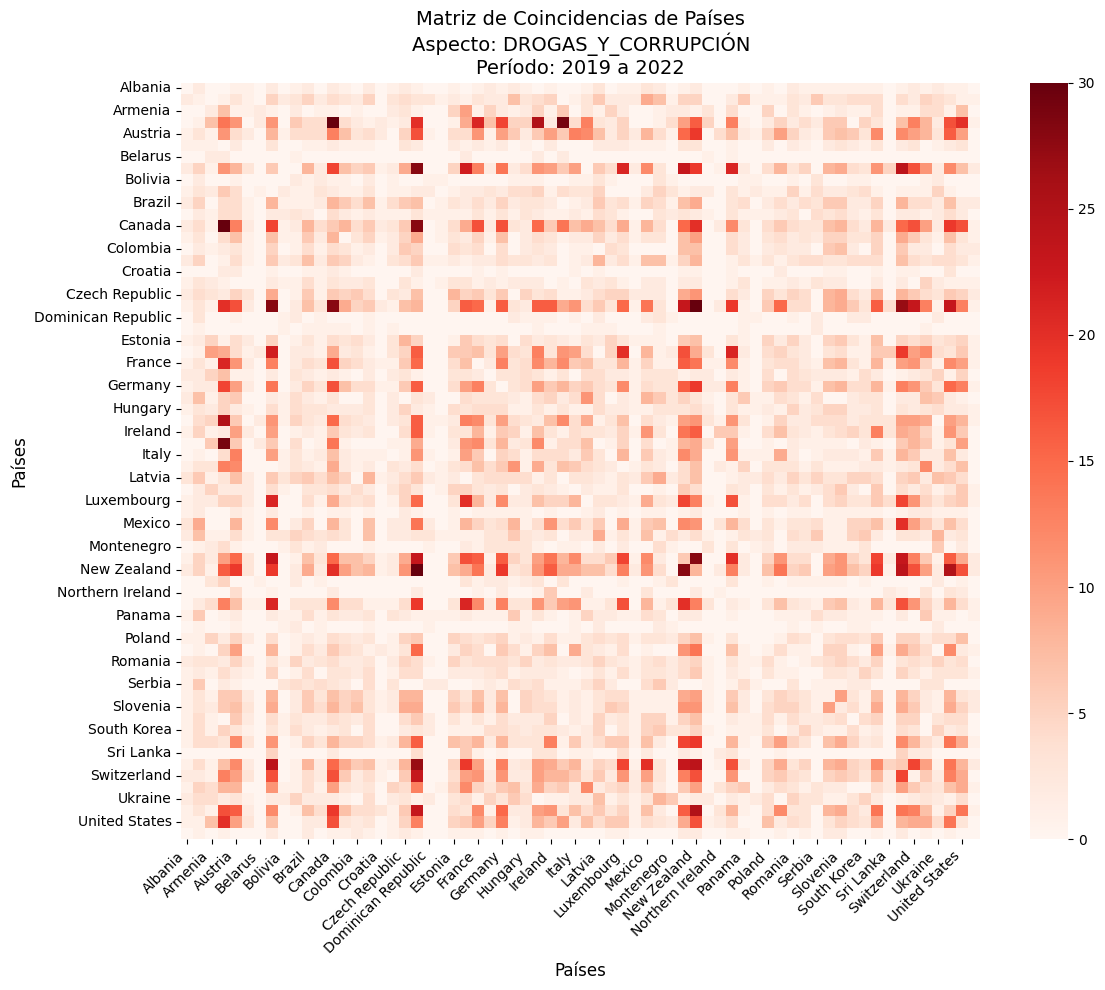

In [22]:
# Crear un DataFrame a partir de las coincidencias
countries = sorted(set([c for pair in country_pairs.keys() for c in pair]))
matrix = pd.DataFrame(0, index=countries, columns=countries)

for (country1, country2), count in country_pairs.items():
    matrix.loc[country1, country2] = count
    matrix.loc[country2, country1] = count  # La matriz es simétrica

# Graficar el heatmap de coincidencias
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, cmap='Reds', annot=False, cbar=True)
plt.title(f'Matriz de Coincidencias de Países\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}', fontsize=14)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Países', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Celda 14: Análisis de consistencia de agrupación

In [23]:
# Analizar los países con mayor consistencia de agrupación
consistent_countries = matrix.sum(axis=1).sort_values(ascending=False)

print("Países con mayor consistencia de agrupación (más coincidencias):")
print(consistent_countries.head(10))


Países con mayor consistencia de agrupación (más coincidencias):
Denmark           557
New Zealand       553
Netherlands       492
Canada            471
Belgium           470
Sweden            467
Australia         424
United Kingdom    396
Germany           384
Austria           373
dtype: int64


#### Creamos la matriz de coincidencias

In [24]:
from itertools import combinations
import pandas as pd

# Crear una lista para almacenar las coincidencias entre países
coincidence_counts = {}

# Agrupar los datos de df_pca por períodos
for periodo, df_pca_periodo in df_pca.groupby('agno'):
    for cluster in range(optimal_k):
        cluster_data = df_pca_periodo[df_pca_periodo['cluster'] == cluster]
        countries = cluster_data['countryname'].dropna().tolist()  # Eliminar NaN
        for pair in combinations(countries, 2):
            pair = tuple(sorted(pair))  # Asegurar orden
            if pair not in coincidence_counts:
                coincidence_counts[pair] = 0
            coincidence_counts[pair] += 1

# Convertir el diccionario de coincidencias en un DataFrame
coincidence_matrix = pd.DataFrame.from_dict(coincidence_counts, orient='index', columns=['coincidence'])
coincidence_matrix.index = pd.MultiIndex.from_tuples(coincidence_matrix.index, names=['País 1', 'País 2'])
coincidence_matrix = coincidence_matrix.reset_index()


#### 1: Bloques de países que tienden a agruparse

In [25]:
print("Países únicos en el eje vertical:", coincidence_matrix.index.tolist())
print("Países únicos en el eje horizontal:", coincidence_matrix.columns.tolist())


Países únicos en el eje vertical: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Países únicos en el eje horizontal: ['País 1', 'País 2', 'coincidence']


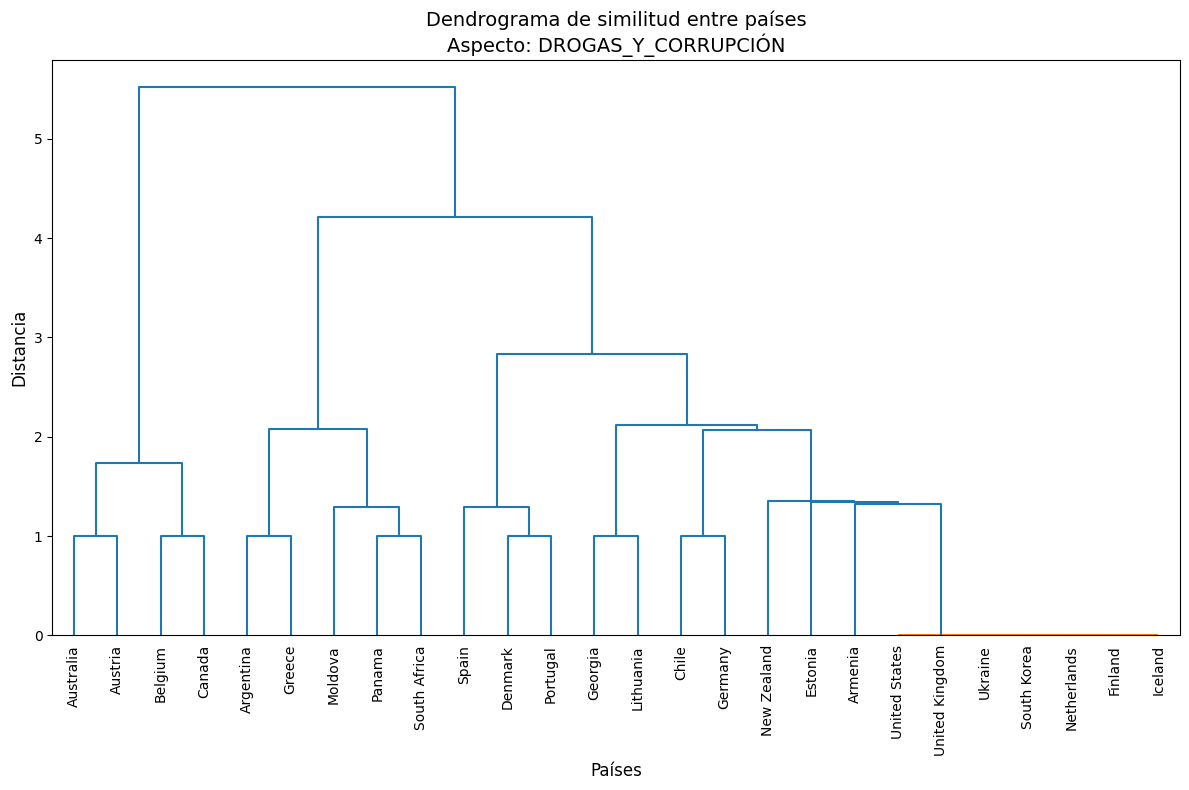

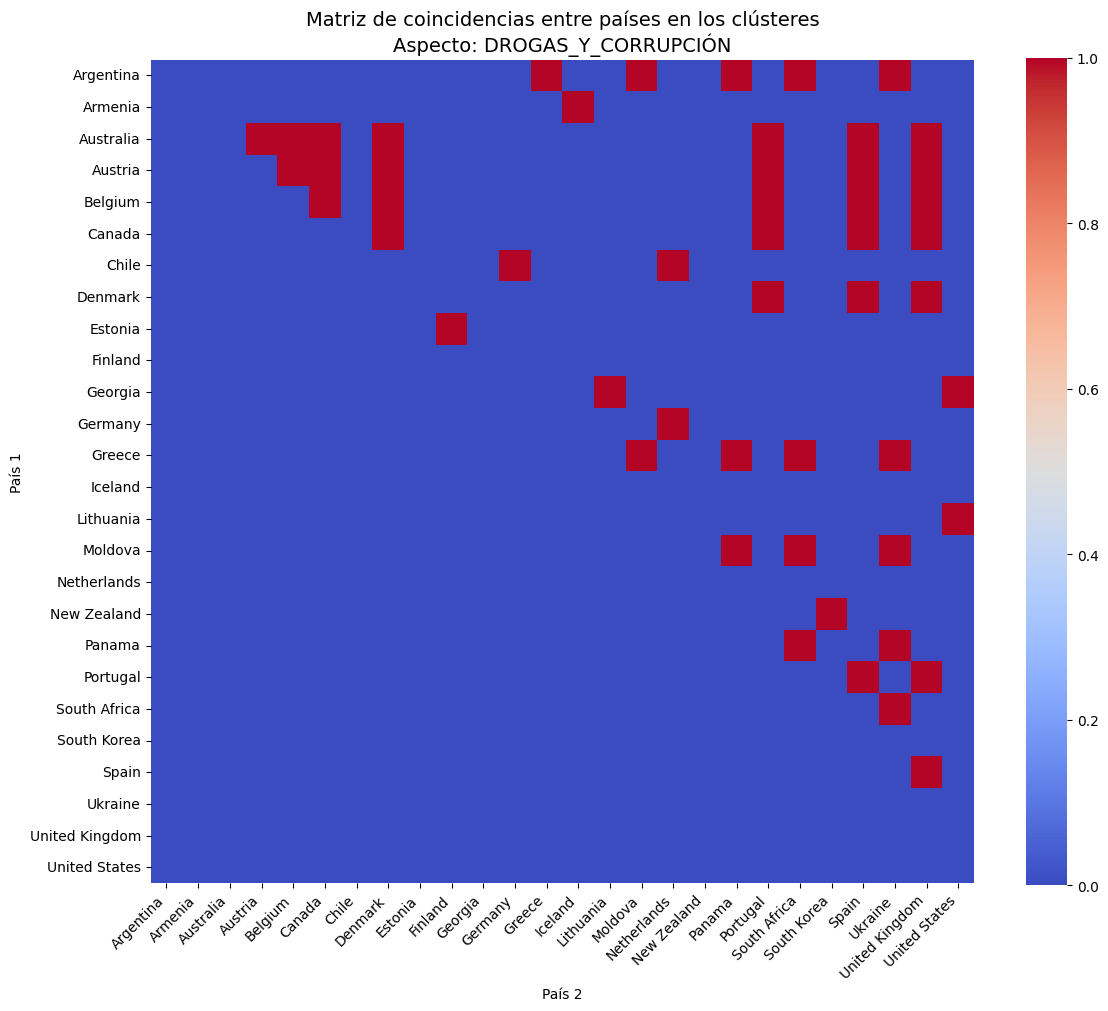

In [29]:
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Asegurar que todos los índices y columnas sean cadenas
coincidence_matrix['País 1'] = coincidence_matrix['País 1'].astype(str)
coincidence_matrix['País 2'] = coincidence_matrix['País 2'].astype(str)

# Crear una lista de todos los países únicos
all_countries = sorted(set(coincidence_matrix['País 1']) | set(coincidence_matrix['País 2']))

# Crear una matriz simétrica
coincidence_pivot = coincidence_matrix.pivot(index='País 1', columns='País 2', values='coincidence').fillna(0)
coincidence_pivot = coincidence_pivot.reindex(index=all_countries, columns=all_countries, fill_value=0)

# Realizar un linkage jerárquico
linkage_matrix = linkage(coincidence_pivot, method='ward')

# Crear un dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=all_countries, leaf_rotation=90, leaf_font_size=10, color_threshold=0.5)
plt.title(f'Dendrograma de similitud entre países\nAspecto: {aspecto_filtro}', fontsize=14)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.tight_layout()
plt.show()

# Graficar un heatmap para visualizar los bloques
plt.figure(figsize=(12, 10))
plt.title(f'Matriz de coincidencias entre países en los clústeres\nAspecto: {aspecto_filtro}', fontsize=14)
sns.heatmap(coincidence_pivot, annot=False, cmap='coolwarm', cbar=True, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### 2: Consistencia entre países

In [30]:
# Calcular el puntaje de consistencia para cada país
country_consistency = coincidence_matrix.sum(axis=1).sort_values(ascending=False)

# Mostrar los países más consistentes
print("\nTop países más consistentes:")
display(country_consistency.head(10))

# Graficar los puntajes de consistencia
plt.figure(figsize=(12, 6))
country_consistency.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Países más consistentes en compartir clusters")
plt.ylabel("Puntaje de Consistencia")
plt.xlabel("País")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()


TypeError: can only concatenate str (not "int") to str

#### 3: Evolución de bloques en el tiempo

In [31]:
# Graficar la evolución de los bloques de países en el espacio PCA
for inicio in periodos:
    fin = inicio + 4
    df_pca_periodo = pca_data.get((inicio, fin))
    if df_pca_periodo is not None:
        plt.figure(figsize=(10, 6))
        for cluster in range(optimal_k):
            cluster_data = df_pca_periodo[df_pca_periodo['cluster'] == cluster]
            plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)
        plt.title(f"Evolución de Bloques en el Período {inicio}-{fin}")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()


NameError: name 'pca_data' is not defined